<a href="https://colab.research.google.com/github/Deadkiller43/MLBasics/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT 2

##1. Create a Pandas DataFrame from the following dictionary:
data = {
 'Name': ['Alice', 'Bob', 'Carol'],
 'Age': [24, 27, 22],
 'Salary': [50000, 55000, 48000]
}


In [2]:
import pandas as pd
import numpy as np
data = { 'Name': ['Alice', 'Bob', 'Carol'], 'Age': [24, 27, 22], 'Salary': [50000, 55000, 48000] }
df1 = pd.DataFrame(data)

• Add a new column called Bonus which is 10% of the salary.

In [ ]:
df1['Bonus'] = 0.1 * df1['Salary']
df1

,Name,Age,Salary,Bonus
0,Alice,24,50000,5000.0
1,Bob,27,55000,5500.0
2,Carol,22,48000,4800.0


##2. Given the DataFrame created in the above question:
• Display the first two rows.

In [ ]:
df1.head(2)

    Name  Age  Salary   Bonus
0  Alice   24   50000  5000.0
1    Bob   27   55000  5500.0


• Compute the mean salary.

In [ ]:
df1['Salary'].mean()

51000.0

##3. Using the same DataFrame:
• Extract all rows where the Age is greater than 25.

In [ ]:
df1[df1["Age"] > 25]

,Name,Age,Salary,Bonus
1,Bob,27,55000,5500.0


• Filter out rows where the Salary is less than 50000.

In [ ]:
df1[df1['Salary'] < 50000]

,Name,Age,Salary,Bonus
2,Carol,22,48000,4800.0


##4. Create the following DataFrame:
data = {
          'A': [1, 2, None, 4],
          'B': [None, 2, 3, None],
          'C': [1, 2, 3, 4]
      }
df = pd.DataFrame(data)

In [3]:
data = {'A': [1, 2, None, 4], 'B': [None, 2, 3, None], 'C': [1, 2, 3, 4]}
df = pd.DataFrame(data)
df

• Fill missing values in column A with the mean of the column

In [7]:
df['A'].fillna(df['A'].mean())
df

,A,B,C
0,1.000000,NaN,1
1,2.000000,2.0,2
2,2.333333,3.0,3
3,4.000000,NaN,4


• Drop rows where all values are None.

In [8]:
df.dropna(how='all')
df

,A,B,C
0,1.000000,NaN,1
1,2.000000,2.0,2
2,2.333333,3.0,3
3,4.000000,NaN,4


##5. Create a DataFrame for employees:
data = {
 'Department': ['HR', 'HR', 'IT', 'IT', 'Finance'],
 'Employee': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
 'Salary': [50000, 45000, 60000, 65000, 70000]
}

In [9]:
data = { 'Department': ['HR', 'HR', 'IT', 'IT', 'Finance'], 'Employee': ['Alice', 'Bob', 'Carol', 'David', 'Eve'], 'Salary': [50000, 45000, 60000, 65000, 70000] }
df = pd.DataFrame(data)
df

,Department,Employee,Salary
0,HR,Alice,50000
1,HR,Bob,45000
2,IT,Carol,60000
3,IT,David,65000
4,Finance,Eve,70000


• Group the data by Department and compute the total and mean salary for each
department.

In [12]:
df.groupby('Department').agg({'Salary': ['sum', 'mean']})

Salary         
               sum     mean
Department                 
Finance      70000  70000.0
HR           95000  47500.0
IT          125000  62500.0

##6. Given two DataFrames:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Carol']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Age': [25, 30, 22]})


In [14]:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Carol']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Age': [25, 30, 22]})

• Perform an inner join on the ID column.

In [15]:
pd.merge(df1, df2, on='ID', how='inner')

,ID,Name,Age
0,2,Bob,25
1,3,Carol,30


##7. Given a small dataset, clean and display basic statistics using Pandas

In [16]:
df1.describe()

,ID
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


##8. small EDA task
• Load the Titanic dataset (titanic.csv) into a Pandas DataFrame.

In [17]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

###• Perform the following tasks:

o Display the number of missing values in each column.


In [18]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


o Find the average age of passengers.

In [20]:
df['Age'].mean()

29.69911764705882

o Create a bar plot to show the survival rate based on gender.

<Axes: xlabel='Sex'>

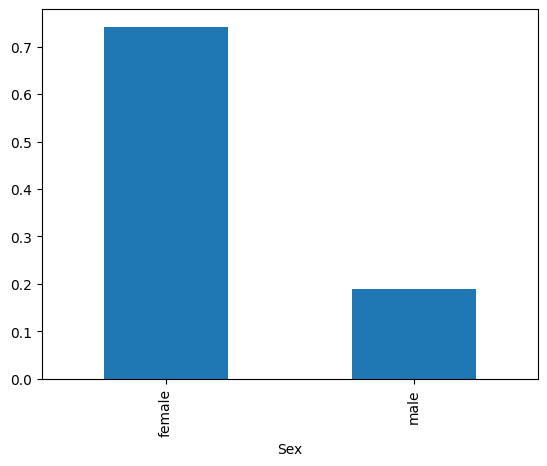

In [21]:
import matplotlib.pyplot as plt
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

##9. Data Transformation
###• Load a dataset containing daily temperatures and dates. Perform the following:

In [48]:
df = pd.read_csv("/content/nyc_Jan_Jun_2016_weat.csv")

pandas.core.frame.DataFrame

o Convert the date column into a DateTime object.

In [55]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE']
df.columns

Index(['DATE', 'LATITUDE', 'LONGITUDE', 'SNOW', 'PRCP', 'SNWD', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')

o Create a new column that categorizes temperatures into High, Medium, or
Low.

In [57]:
high_threshold = 80
medium_threshold = 60
df['Temperature_Category'] = pd.cut(df['TAVG'], bins=[-float('inf'), medium_threshold, high_threshold, float('inf')],labels=['Low', 'Medium', 'High'])
df

,DATE,LATITUDE,LONGITUDE,SNOW,PRCP,SNWD,TAVG,TMAX,TMIN,Temperature_Category
0,1970-01-01 00:00:00.020160101,41.06390,-73.77220,0.0,0.00,-9999.0,-9999,-9999,-9999,Low
1,1970-01-01 00:00:00.020160102,41.06390,-73.77220,0.0,0.00,-9999.0,-9999,-9999,-9999,Low
2,1970-01-01 00:00:00.020160103,41.06390,-73.77220,0.0,0.00,-9999.0,-9999,-9999,-9999,Low
3,1970-01-01 00:00:00.020160104,41.06390,-73.77220,0.0,0.00,-9999.0,-9999,-9999,-9999,Low
4,1970-01-01 00:00:00.020160105,41.06390,-73.77220,0.0,0.00,-9999.0,-9999,-9999,-9999,Low
...,...,...,...,...,...,...,...,...,...,...
32202,1970-01-01 00:00:00.020170709,40.73417,-73.41694,-9999.0,0.00,-9999.0,-9999,82,67,Low
32203,1970-01-01 00:00:00.020170710,40.73417,-73.41694,-9999.0,0.00,-9999.0,-9999,81,64,Low
32204,1970-01-01 00:00:00.020170711,40.73417,-73.41694,-9999.0,0.06,-9999.0,-9999,86,74,Low
32205,1970-01-01 00:00:00.020170712,40.73417,-73.41694,-9999.0,0.00,-9999.0,-9999,90,74,Low
